### Name - Anirudh Tyagi
### School - School Of Computing and Data Science
### E-mail - anirudh.t-26@scds.saiuniversity.edu.in

In [1]:
import tensorflow as tf

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

/Users/anirudhtyagi/Projects/DL_PROJECT/dl_project/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from numpy import load
X_train_std = load('/Users/anirudhtyagi/Projects/DL_PROJECT/X_train_std.npy')
X_test_std = load('/Users/anirudhtyagi/Projects/DL_PROJECT/X_test_std.npy')
y_train = load('/Users/anirudhtyagi/Projects/DL_PROJECT/y_train.npy')
y_test = load('/Users/anirudhtyagi/Projects/DL_PROJECT/y_test.npy')

In [3]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (719, 299, 299, 3)
X_test_std_shape: (240, 299, 299, 3)


In [5]:
model2_FT = keras.models.load_model("/Users/anirudhtyagi/Projects/DL_PROJECT/Model2_TL.keras")
model2_FT.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,948,769 (22.69 MB)

 Trainable params: 8,965 (35.02 KB)

 Non-trainable params: 5,921,872 (22.59 MB)

 Optimizer params: 17,932 (70.05 KB)

In [6]:
print(len(model2_FT.layers))
print(int(0.25*(len(model2_FT.layers))))

274
68


In [7]:
for layer in model2_FT.layers[:int(0.35*(len(model2_FT.layers)))]:
  layer.trainable = False
for layer in model2_FT.layers[int(0.35*(len(model2_FT.layers))):]:
  layer.trainable = True

In [8]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model2_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10


2025-01-09 02:42:51.922300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


41/41 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5904 - loss: 1.3095 - val_accuracy: 0.8889 - val_loss: 0.1981
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8718 - loss: 0.4181 - val_accuracy: 0.9444 - val_loss: 0.1681
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8357 - loss: 0.4533 - val_accuracy: 0.9861 - val_loss: 0.0427
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9090 - loss: 0.2451 - val_accuracy: 0.9861 - val_loss: 0.0942
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8912 - loss: 0.2307 - val_accuracy: 0.9028 - val_loss: 0.1592
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9423 - loss: 0.1844 - val_accuracy: 0.9861 - val_loss: 0.0681
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9086 - loss: 0.2304 - val_accuracy: 0.9028 - val_loss: 0.4250
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9116 - loss: 0.2773 - val_accuracy: 0.9028 - val_loss: 0.2192
Ep

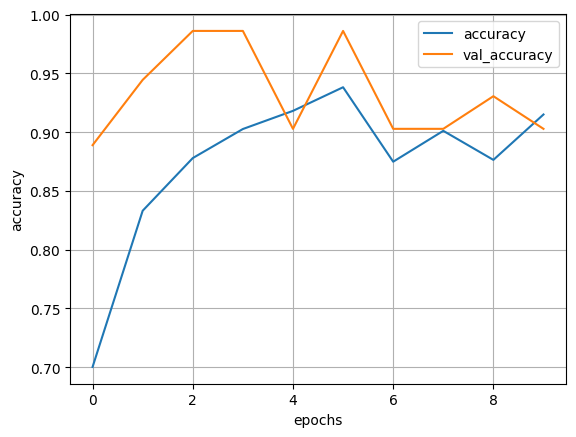

In [9]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [11]:
testLoss_FineTune, testAccuracy_FineTune = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 479ms/step - accuracy: 0.9034 - loss: 0.3667
Test-loss: 0.301581, Test-accuracy: 0.912500


In [12]:
testLoss_FineTune, testAccuracy_FineTune = model2_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.9034 - loss: 0.3667
Test-loss: 0.301581, Test-accuracy: 0.912500


In [13]:

model2_FT.load_weights("bestFT.weights.h5")

In [14]:
y_proba = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step 
[3 4 1 3 1 1 3 0 4 2 2 2 0 1 0 0 3 2 2 3 1 0 0 0 0 1 1 0 3 3 4 4 3 2 3 1 2
 0 3 4 0 3 2 0 0 1 4 2 1 3 4 3 0 1 1 2 3 4 3 1 1 0 0 3 1 0 1 0 3 2 4 1 2 3
 0 3 0 4 3 4 0 3 3 2 4 4 4 2 0 1 0 4 1 1 0 2 0 3 1 2 0 1 3 2 4 4 2 2 1 3 1
 0 3 0 0 3 1 0 2 3 1 0 4 4 2 0 2 0 0 1 3 0 2 2 2 4 1 4 4 4 1 4 3 1 0 4 2 2
 1 2 0 2 2 2 4 1 3 2 2 3 2 1 3 3 4 0 1 4 3 3 4 1 1 1 1 3 4 2 0 4 0 4 3 3 2
 3 2 0 0 0 0 4 1 2 1 3 0 0 4 1 2 1 1 2 2 1 3 3 3 0 1 2 0 4 4 3 0 0 2 4 2 4
 0 3 3 3 4 2 3 0 4 0 1 0 1 1 2 4 3 1]


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[50,  0,  0,  0,  0],
       [ 4, 46,  0,  0,  0],
       [ 0,  3, 46,  0,  1],
       [ 0,  0,  0, 50,  0],
       [ 0,  0,  0,  0, 40]])

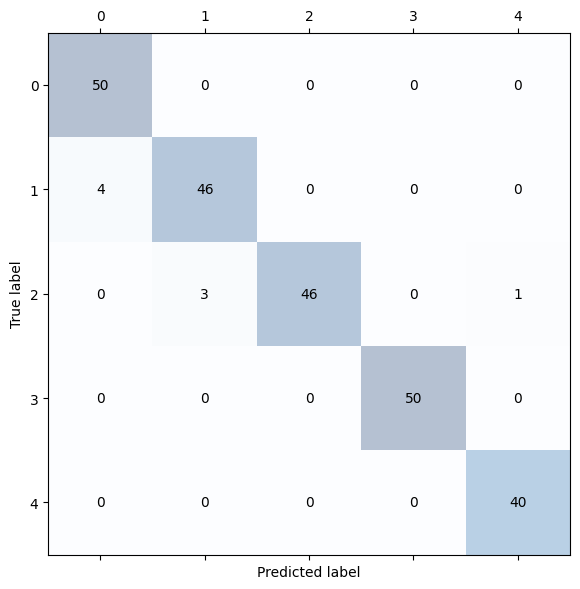

In [16]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.967747758543345
Recall:  0.9666666666666667
F1-score:  0.9665183710322599






In [ ]:
model2_FT.save("/Users/anirudhtyagi/Projects/DL_PROJECT/Model2_FT.keras")